In [1]:
import pandas as pd
import scanpy as sc
import numpy as np 

In [2]:
import pegasus
import pegasusio

In [19]:
pegasus_resuls_list = []

In [3]:
integrated_coexpressalog_only = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_only_coexpressalogs.loom') # type: ignore
all_genes_integrated = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_all_coexpressalog_and11.loom')  # type: ignore
only_1_1_integrated = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_only11.loom') # type: ignore
random_integration = sc.read_loom('/data/passala/Generated_Tables/Temp_junk/integrated_by_default_seurat_random_genes.loom') # type: ignore


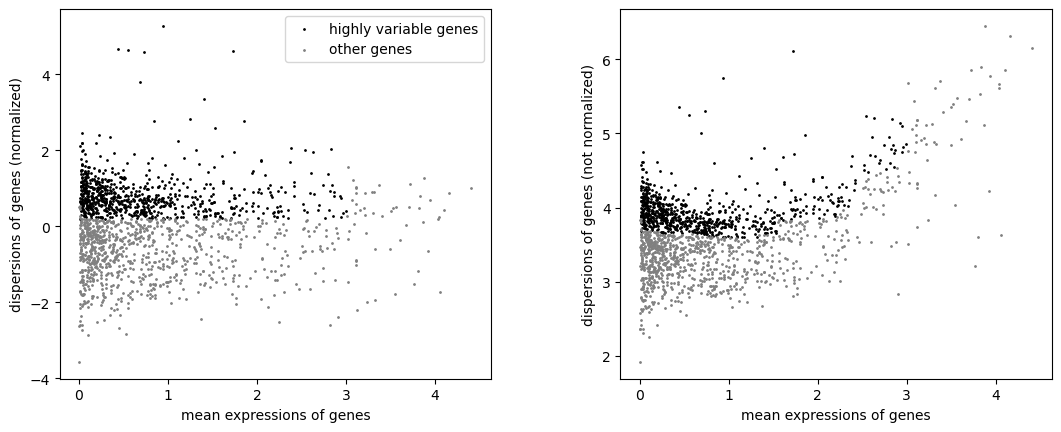

In [4]:
sc.pp.highly_variable_genes(integrated_coexpressalog_only, min_mean=0.0125, max_mean=3, min_disp=0.2) # disp .5
sc.pl.highly_variable_genes(integrated_coexpressalog_only)

         Falling back to preprocessing with `sc.pp.pca` and default params.


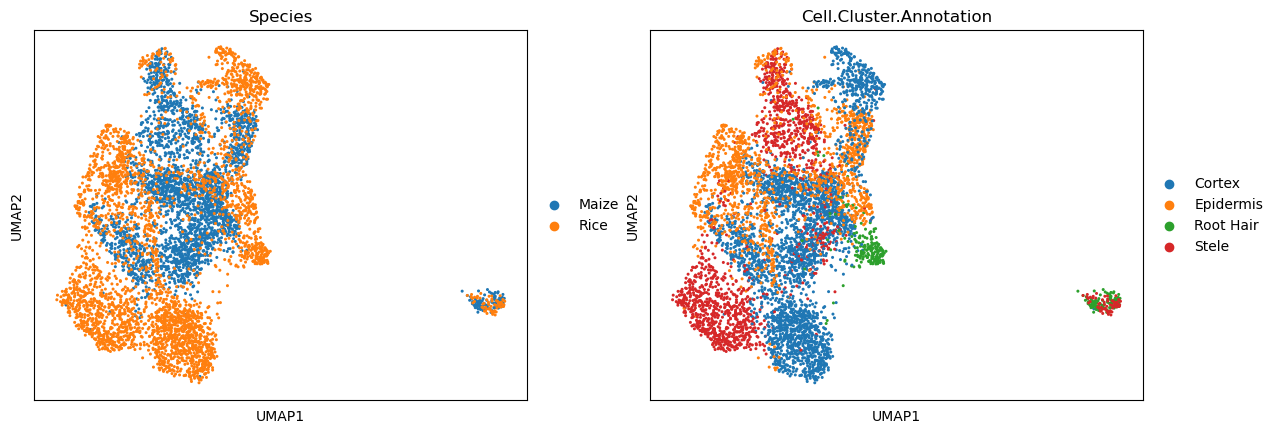

In [5]:
#sc.tl.pca(integrated_coexpressalog_only, svd_solver='arpack', )
sc.pp.neighbors(integrated_coexpressalog_only, n_neighbors=30, n_pcs=50, random_state= 863)
sc.tl.umap(integrated_coexpressalog_only, random_state= 2335)
sc.pl.umap(integrated_coexpressalog_only, color=['Species', 'Cell.Cluster.Annotation'])

In [6]:
pegasus_version_integrated_coexpressalog_only = pegasusio.MultimodalData(integrated_coexpressalog_only)

In [7]:
pegasus_kbet_results = pegasus.calc_kBET(data = pegasus_version_integrated_coexpressalog_only, attr ='Species', K = 50)

2022-09-06 10:52:04,229 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.78s.


In [8]:
pegasus_kbet_results

(35.41206924132154, 0.03732409312936315, 0.09538850284270373)

         Falling back to preprocessing with `sc.pp.pca` and default params.


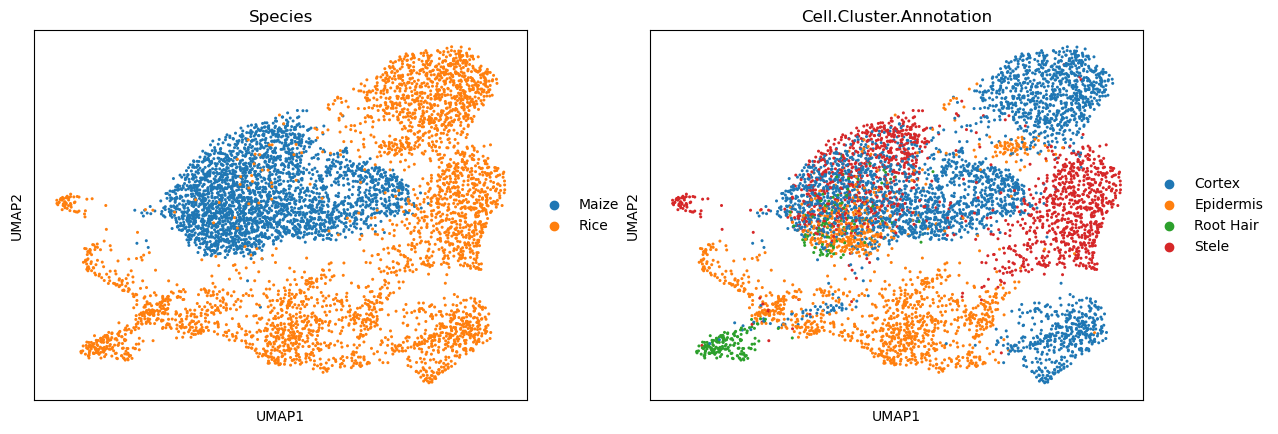

In [9]:
sc.pp.neighbors(random_integration, n_neighbors=30, n_pcs=50, random_state= 8693)
sc.tl.umap(random_integration, random_state= 54)
sc.pl.umap(random_integration, color=['Species', 'Cell.Cluster.Annotation'])

In [10]:
random_integration_pegasus = pegasusio.MultimodalData(random_integration)


In [11]:
pegasus_kbet_results_random = pegasus.calc_kBET(data = random_integration_pegasus, attr ='Species', K = 50)

2022-09-06 10:52:31,177 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.77s.


In [12]:
pegasus_kbet_results_random

(44.400201533491796, 0.019738895789430357, 0.04943145925457991)

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


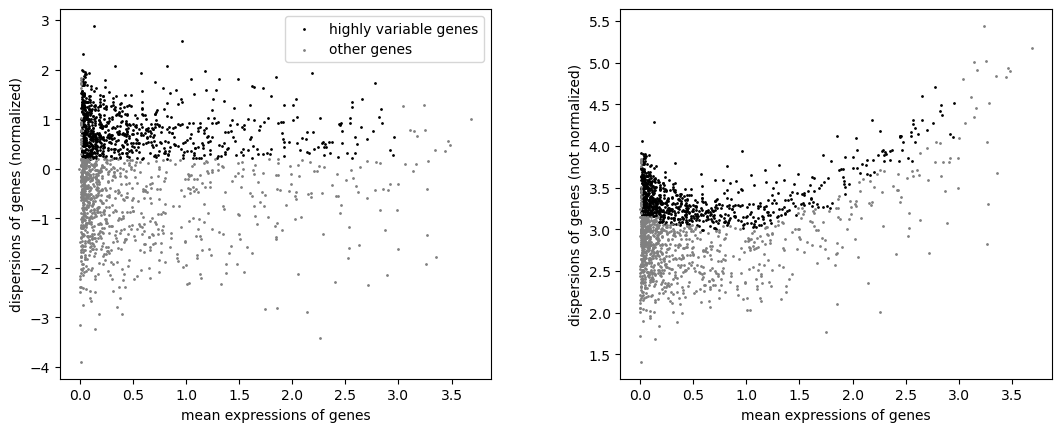

In [13]:
sc.pp.highly_variable_genes(all_genes_integrated, min_mean=0.0125, max_mean=3, min_disp=0.2) # disp .5
sc.pl.highly_variable_genes(all_genes_integrated)

         Falling back to preprocessing with `sc.pp.pca` and default params.


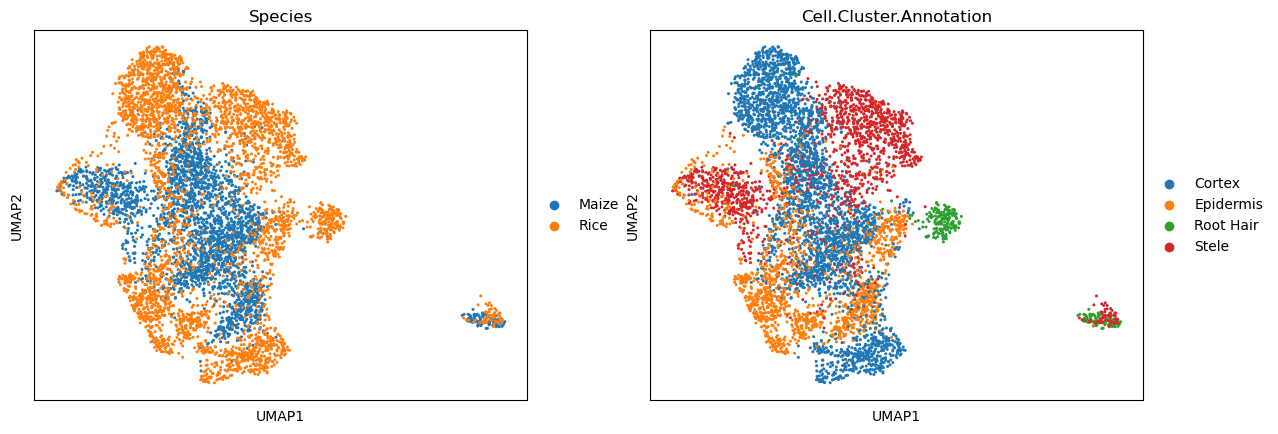

In [14]:
sc.pp.neighbors(all_genes_integrated, n_neighbors=30, n_pcs=50, random_state= 8693)
sc.tl.umap(all_genes_integrated, random_state= 54)
sc.pl.umap(all_genes_integrated, color=['Species', 'Cell.Cluster.Annotation'])

In [15]:
all_genes_pegasus = pegasusio.MultimodalData(all_genes_integrated)
pegasus_kbet_results_all_genes = pegasus.calc_kBET(data = all_genes_pegasus, attr ='Species', K = 50)
pegasus_kbet_results_all_genes

2022-09-06 10:52:53,451 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.92s.


(30.39020487489806, 0.0424826318407993, 0.11133922931143399)

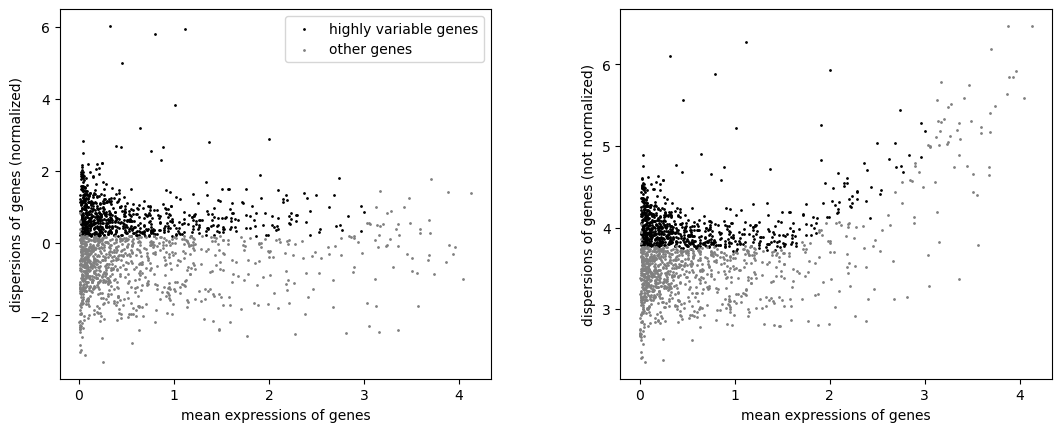

In [16]:
sc.pp.highly_variable_genes(only_1_1_integrated, min_mean=0.0125, max_mean=3, min_disp=0.2) # disp .5
sc.pl.highly_variable_genes(only_1_1_integrated)

         Falling back to preprocessing with `sc.pp.pca` and default params.


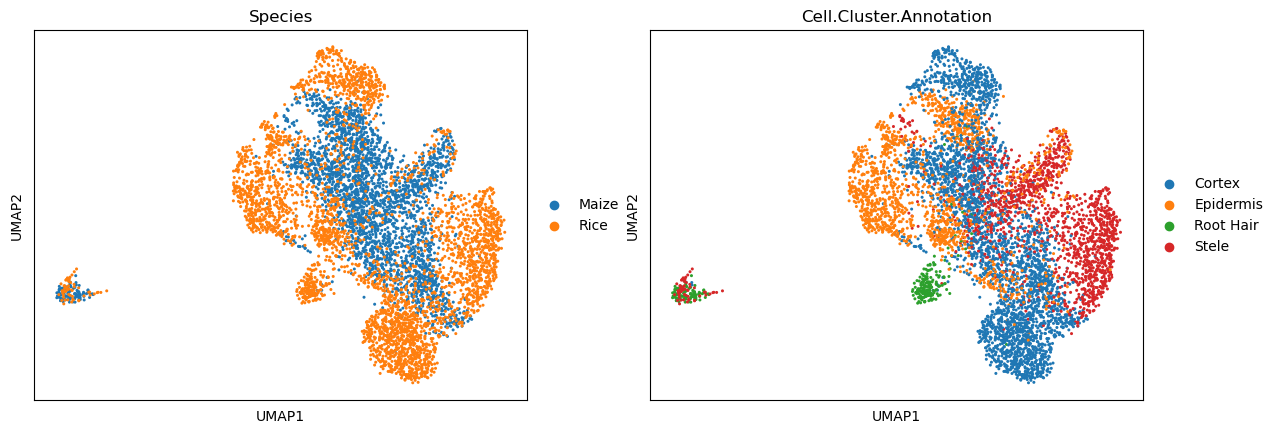

In [17]:

sc.pp.neighbors(only_1_1_integrated, n_neighbors=30, n_pcs=50, random_state= 8693)
sc.tl.umap(only_1_1_integrated, random_state= 54)
sc.pl.umap(only_1_1_integrated, color=['Species', 'Cell.Cluster.Annotation'])

In [18]:
one_one_pegasus = pegasusio.MultimodalData(only_1_1_integrated)
pegasus_kbet_results_one_one = pegasus.calc_kBET(data = one_one_pegasus, attr ='Species', K = 50)
pegasus_kbet_results_one_one

2022-09-06 10:53:14,542 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.81s.


(31.67806958837662, 0.046959738907510505, 0.11718256475047378)

In [23]:
pegasus_resuls_list = []

In [24]:
pegasus_resuls_list.append(pegasus_kbet_results_all_genes[2])
pegasus_resuls_list.append(pegasus_kbet_results[2])
pegasus_resuls_list.append(pegasus_kbet_results_one_one[2])
pegasus_resuls_list.append(pegasus_kbet_results_random[2])

In [25]:
pegasus_resuls_list

[0.11133922931143399,
 0.09538850284270373,
 0.11718256475047378,
 0.04943145925457991]

In [27]:
pegasus_results_names  = ['All Coexpressalogs and One To One Genes','Coexpressalogs Only','One to One Only','Random Gene Maps']

In [28]:
dataframe_of_results = pd.DataFrame(data = zip(pegasus_results_names, pegasus_resuls_list), columns = ['Gene Set','KBET Score (Higher Is Better'])
dataframe_of_results

,Gene Set,KBET Score (Higher Is Better
0,All Coexpressalogs and One To One Genes,0.111339
1,Coexpressalogs Only,0.095389
2,One to One Only,0.117183
3,Random Gene Maps,0.049431


In [ ]:
fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.lineplot(x ='n_genes',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)